# 1- Importing & setup

We first start by importing all the libraries

In [1]:
from figures_handler import method_colors as method_colors
from figures_handler import method_names as method_names
from figures_handler import colors as colors
import matplotlib.patches as mpatches
from pandas.plotting import table
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import figures_handler as fh
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os

Then, we load the libraries and the experiments, the experiments are loaded as the files contains the information about availability of annotated shifted peaks.

In [2]:
# get the project root
dir_path = os.path.abspath('')
project_root = os.path.abspath(os.path.join(dir_path, os.pardir))

experiment_directory = os.path.join(project_root, 'experiments_settings', "experiments_meta_helpers.csv")
data_folder, results_directory, matches_directory, libraries, library_names = fh.get_basic_data(project_root)

display(libraries[['Library', 'short_name']])


,Library,short_name
0,GNPS-MSMLS,lib1
1,GNPS-NIH-NATURALPRODUCTSLIBRARY_ROUND2_POSITIVE,lib2
2,GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE,lib3
3,BERKELEY-LAB,lib4


In [3]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 25}
font_labels = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 30}

# Drawing the table for our data

## Draw distribution of useful pairs

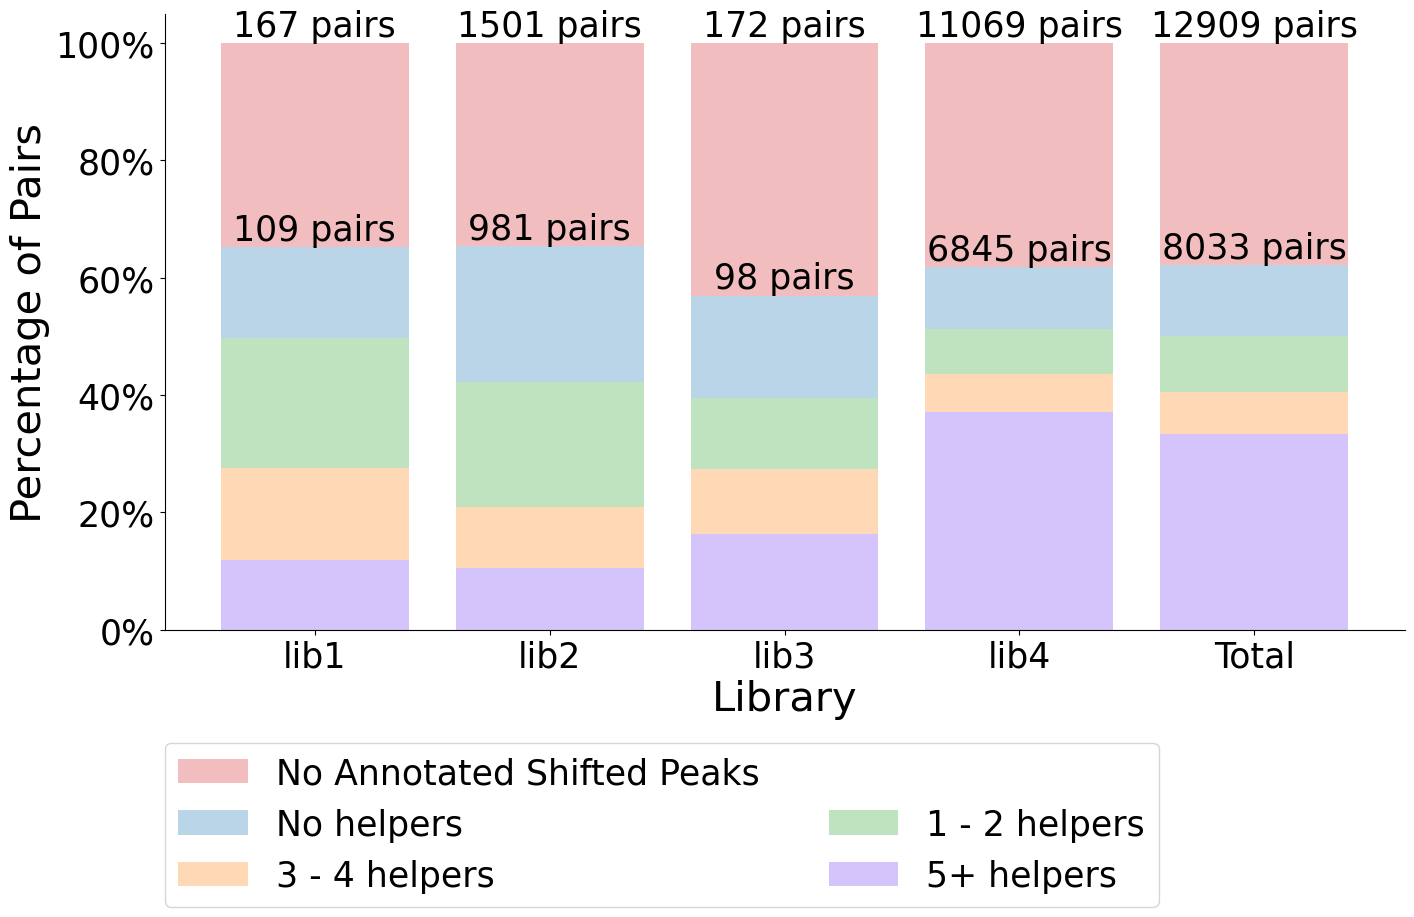

In [4]:
cols_compare = ["id_known", "id_unknown"]
cols_val = "average_dist_normalized"
cols_meta = ['shifted_annotated_ambiguity', 'matched', 'weight', 'delta', 'peaks', 'num_helpers']
lege = ["No Annotated Shifted Peaks", "No helpers", "1 - 2 helpers", "3 - 4 helpers", "5+ helpers"]
n_groups = len(library_names)
vals = {}
rects = [[] for i in range(len(lege))]


fig, ax = plt.subplots(figsize=(3.2 * (len(library_names) + 1), 8))
bar_width = 0.8
opacity = 0.2

columns = ["short_name", "long_name", "number of related pairs", "matches with exactly one modification site", "matches with M_H adduct", "matches with at least of annotated shifted peak"]
table = pd.DataFrame()

total = {}
for col in lege:
    total[col] = 0

for index, library in enumerate(library_names):
    library_data = {}
    library_data["short_name"] = library_names[library]
    library_data["long_name"] = library


    df, data, methods = fh.get_all(library, experiment_directory, results_directory)
    # print(library, methods)
    merged_df = fh.create_merged_libraries(data, methods, cols_compare, cols_val, cols_meta)
    # print(len(merged_df))

    vals[library] = []
    whole = len(merged_df)/100
    vals[library].append(len(merged_df)/whole)
    total["No Annotated Shifted Peaks"] += len(merged_df)

    library_data["matches with M_H adduct"] = len(merged_df)
    merged_df = merged_df[merged_df["shifted_annotated_ambiguity"] > 0]
    vals[library].append(len(merged_df)/whole)
    total["No helpers"] += len(merged_df)

    library_data["matches with at least of annotated shifted peak"] = len(merged_df)
    merged_df = merged_df[merged_df["num_helpers"] > 0]
    vals[library].append(len(merged_df)/whole)
    total["1 - 2 helpers"] += len(merged_df)
    merged_df = merged_df[merged_df["num_helpers"] > 2]
    vals[library].append(len(merged_df)/whole)
    total["3 - 4 helpers"] += len(merged_df)

    merged_df = merged_df[merged_df["num_helpers"] > 4]
    vals[library].append(len(merged_df)/whole)
    total["5+ helpers"] += len(merged_df)
    # draw the bars on top of each other
    for i in range(len(lege)):
        rect = ax.bar(index, vals[library][i], bar_width, alpha=1, color=colors[i], label=lege[i])
        rects[i] = rect
    
    # add total number to the top
    ax.text(index, 100, str(int(whole * 100)) + " pairs", ha='center', va='bottom', fontsize=font['size'])

    # add the useable data
    ax.text(index, vals[library][1], str(library_data["matches with at least of annotated shifted peak"]) + " pairs", ha='center', va='bottom', fontsize=font['size'])


    # populate the table with the data
    table = table.append(library_data, ignore_index=True)

whole = total["No Annotated Shifted Peaks"]/100
# draw one for total
for i in range(len(lege)):
    rect = ax.bar(n_groups, total[lege[i]]/whole, bar_width, alpha=1, color=colors[i], label=lege[i])
    rects[i] = rect
ax.text(n_groups, 100, str(int(whole * 100)) + " pairs", ha='center', va='bottom', fontsize=font['size'])
ax.text(n_groups, total["No helpers"]/whole, str(total["No helpers"]) + " pairs", ha='center', va='bottom', fontsize=font['size'])


# remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# adding the legend
# add dummy item to legend to make it look better
rects.insert(3, mpatches.Patch(color='none', label=''))
rects[2], rects[4] = rects[4], rects[2]
plt.legend(handles=rects, bbox_to_anchor=(0, -0.45), loc='lower left', borderaxespad=0., ncol=2, fontsize=font['size'])

plt.xlabel('Library', fontsize=font_labels['size'])
plt.ylabel('Percentage of Pairs', fontsize=font_labels['size'])
names = [library_names[library] for library in library_names]
names.append("Total")
plt.xticks(np.arange(n_groups+1), names, fontsize=font['size'])

# show y ticks as percentage
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x/100) for x in vals])

# set font size of x and y ticks
plt.xticks(fontsize=font['size'])
plt.yticks(fontsize=font['size'])

plt.show()
    

In [5]:
# # add total row to the table
# short_name = "Total"
# long_name = "Total"
# matches_with_M_H_adduct = table["matches with M_H adduct"].sum()
# matches_with_at_least_of_annotated_shifted_peak = table["matches with at least of annotated shifted peak"].sum()
# table = table.append(pd.Series([short_name, long_name, matches_with_M_H_adduct, matches_with_at_least_of_annotated_shifted_peak], index=table.columns), ignore_index=True)
# table

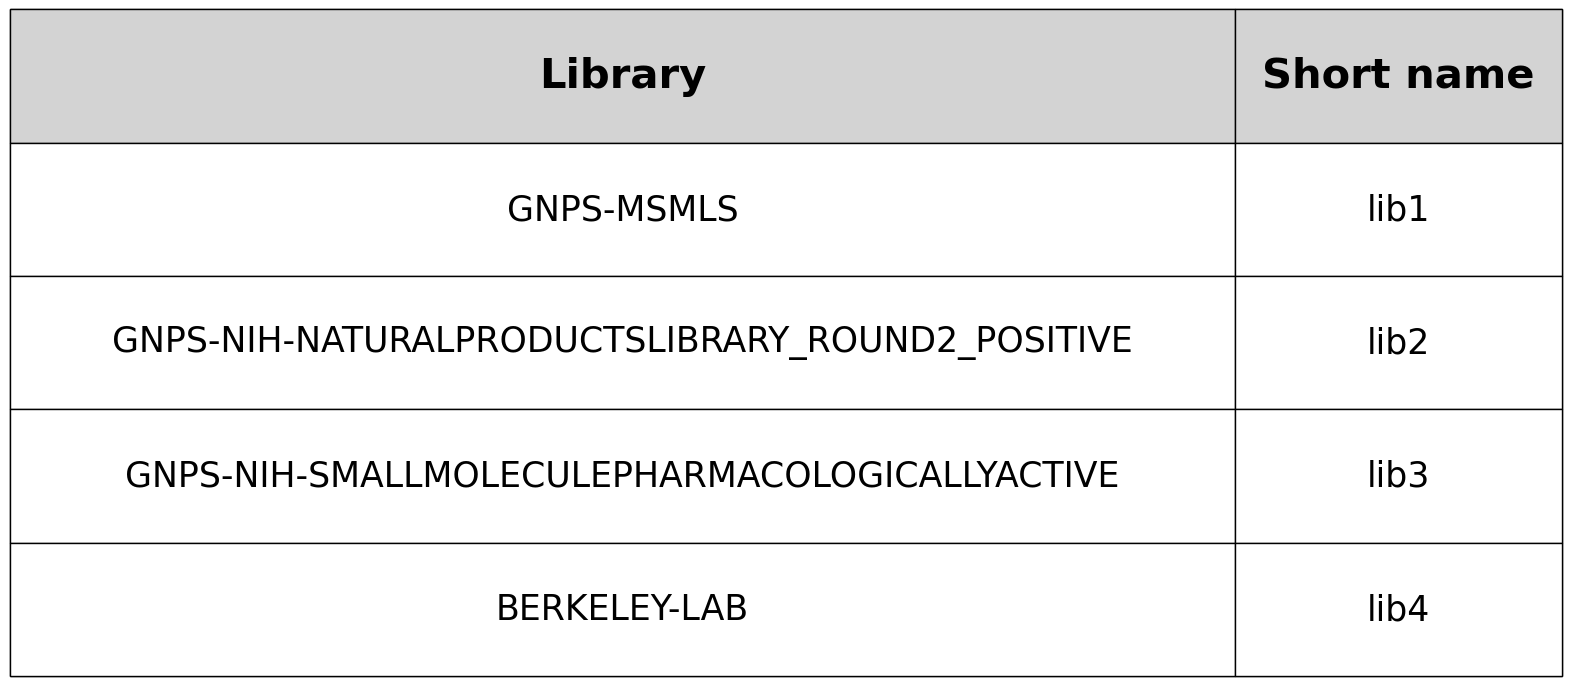

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
libraries = libraries[['Library', 'short_name']]
table = table[["long_name", "short_name"]]#, "matches with M_H adduct", "matches with at least of annotated shifted peak"]]
ax.axis('off')
# setting the table
cellLoc = 'center'
rowLoc = 'center'
alpha = 0.5
headers = ["Library", "Short name"]#, "Pairs", "Informative pairs"]
tbl = plt.table(cellText=table.values, colLabels=headers, loc='center', cellLoc=cellLoc, rowLoc=rowLoc)
ax.add_table(tbl)
# increase the font size
tbl.auto_set_font_size(False)
tbl.set_fontsize(font['size'])

# make first column two times wider
tbl.auto_set_column_width([0, 1])
# increase column height
tbl.scale(1, 8)

# make first row bold
for i in range(len(headers)):
    tbl[0, i].get_text().set_fontsize(font_labels['size'])
    tbl[0, i].get_text().set_fontweight(font_labels['weight'])
    # gray background
    tbl[0, i].set_facecolor('lightgrey')

fig.tight_layout()
# plt.savefig('pict.png', bbox_inches='tight', pad_inches = 0)
plt.show()

## Draw distribution of weight

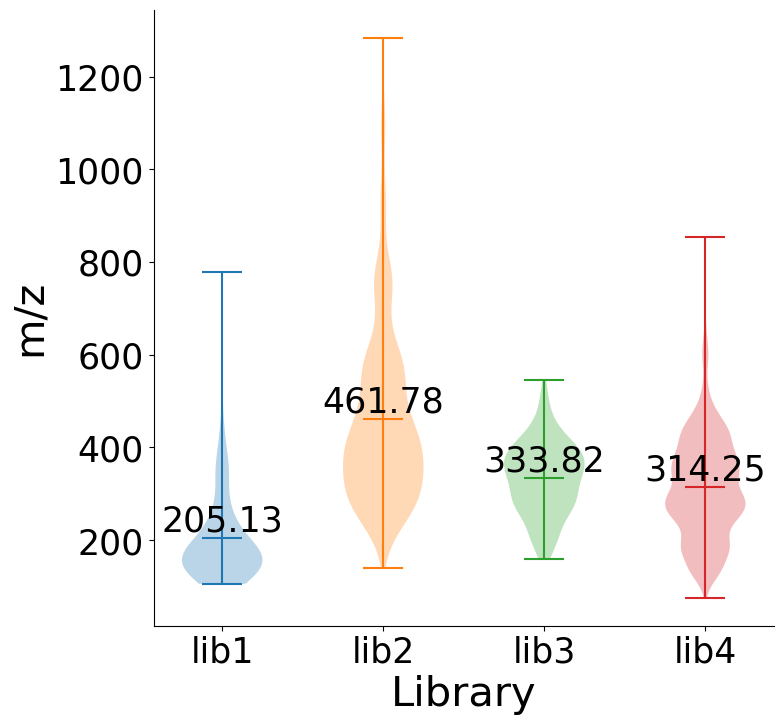

In [7]:
# draw violin plot of the precursors

import seaborn as sns

fig, ax = plt.subplots(figsize=(2 * len(library_names), 8))


for index, library in enumerate(library_names):
    df = pd.read_csv(os.path.join(matches_directory, library + ".csv"))
    # create a map of items to their weights
    smaller = df[["id_smaller", "weight_smaller"]]
    bigger = df[["id_bigger", "weight_bigger"]]
    # stack the data
    smaller.columns = ["id", "weight"]
    bigger.columns = ["id", "weight"]

    data_combined = pd.concat([smaller, bigger])
    # remove duplicates
    data_combined = data_combined.drop_duplicates()

    ax.violinplot(data_combined['weight'], positions=[index], showmeans=True, showmedians=False)
    # add value on top of the bar
    ax.text(index, data_combined['weight'].mean(), round(data_combined['weight'].mean(), 2), ha='center', va='bottom', color='black', fontsize=font['size'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(np.arange(n_groups), library_names.values())
plt.xlabel('Library', fontsize=font_labels['size'])
plt.ylabel('m/z', fontsize=font_labels['size'])
plt.xticks(fontsize=font['size'])
plt.yticks(fontsize=font['size'])

plt.show()


# what is the average and distribution of the number of atoms in each library:

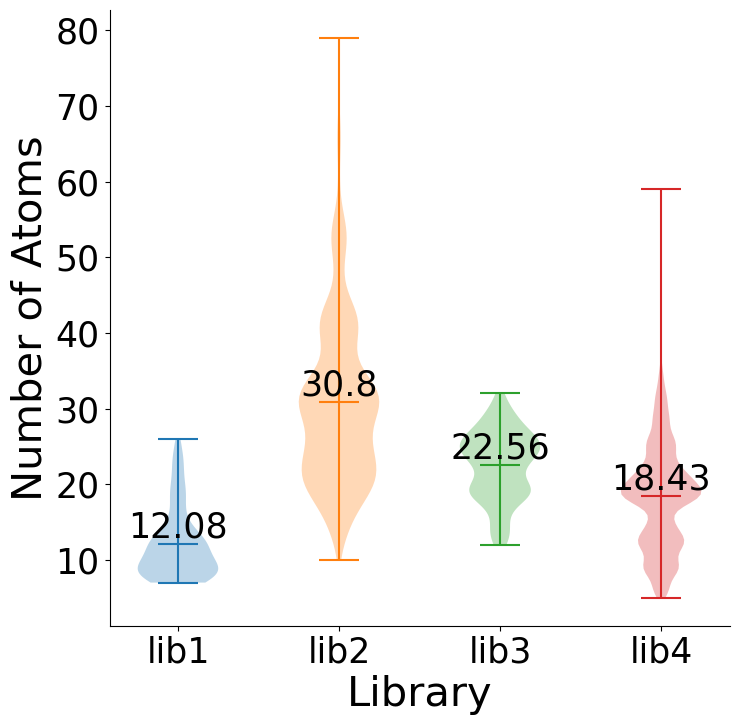

In [8]:
# draw violin plot of the precursors



fig, ax = plt.subplots(figsize=(2 * len(library_names), 8))


for index, library in enumerate(library_names):
    df = pd.read_csv(experiment_directory)
    df = df[df['library'] == library]
    df = df[df['fragment_filter'] == "oracle"]
    id = df.iloc[0]['id']
    data_combined = pd.read_csv(os.path.join(results_directory, id, 'combined.csv'))

    # data_combined = data_combined[data_combined['shifted'] > 0]
    # data_combined = data_combined[data_combined['shifted_annotated_ambiguity'] > 0]

    ax.violinplot(data_combined['num_atoms'], positions=[index], showmeans=True, showmedians=False)
    # add value on top of the bar
    ax.text(index, data_combined['num_atoms'].mean(), round(data_combined['num_atoms'].mean(), 2), ha='center', va='bottom', color='black', fontsize=font['size'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(np.arange(n_groups), library_names.values())
plt.xlabel('Library', fontsize=font_labels['size'])
plt.ylabel('Number of Atoms', fontsize=font_labels['size'])
plt.xticks(fontsize=font['size'])
plt.yticks(fontsize=font['size'])



plt.show()

# the distribution of diffrances

In [9]:
precursors = {}
diffrences = {}
columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
table = pd.DataFrame(columns=columns)
for library in library_names:
    print("Processing library: ", library)
    library_precursors = []
    # read the matches
    matches = pd.read_csv(os.path.join(data_folder,"matches", "{}.csv".format(library)))
    with open(os.path.join(data_folder, "cached_compounds", library + ".pkl"), "rb") as f:
        compounds_data = pickle.load(f)
    # get the unique compounds
    compounds = matches["id_smaller"].unique()
    compounds2 = matches["id_bigger"].unique()
    compounds = list(set(compounds).union(set(compounds2)))

    for compound in compounds:
        c = compounds_data[compound]
        library_precursors.append(float(c["Precursor_MZ"]))
    
    precursors[library] = library_precursors
    diffrences[library] =  matches["difference"].values

    #update the table
    library_data = pd.Series(library_precursors).describe()
    library_data.name = library
    table = table.append(library_data)


# combine diffs
diffrences_combined = []
for library in diffrences:
    if library == 'GNPS-LIBRARY':
        continue
    print(library, len(diffrences[library]))
    diffrences_combined.extend(diffrences[library])
print (len(diffrences_combined))
table


Processing library:  GNPS-MSMLS
Processing library:  GNPS-NIH-NATURALPRODUCTSLIBRARY_ROUND2_POSITIVE
Processing library:  GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE
Processing library:  BERKELEY-LAB
GNPS-MSMLS 167
GNPS-NIH-NATURALPRODUCTSLIBRARY_ROUND2_POSITIVE 1501
GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE 172
BERKELEY-LAB 11057
12897


,count,mean,std,min,25%,50%,75%,max
GNPS-MSMLS,148.0,205.126291,102.234559,106.0500,139.54825,174.5995,227.3600,777.694
GNPS-NIH-NATURALPRODUCTSLIBRARY_ROUND2_POSITIVE,1414.0,461.779023,190.944192,141.0540,323.13325,415.1380,560.0185,1283.630
GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE,135.0,333.823919,78.228605,159.0930,280.60950,341.2150,387.7420,545.011
BERKELEY-LAB,3519.0,314.249959,113.341950,76.0393,239.04400,303.1020,387.1100,854.338


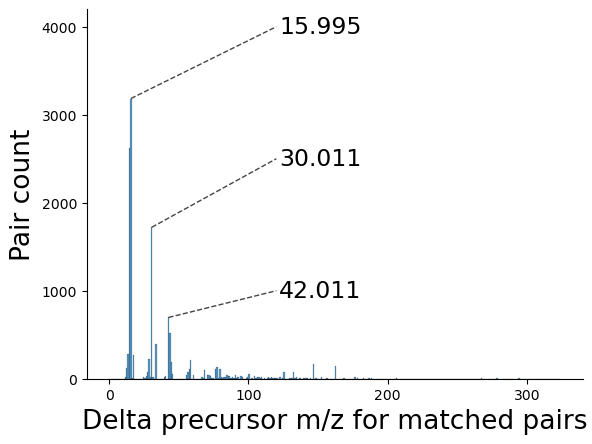

In [10]:
from collections import Counter
# draw histogram
bins = np.arange(0, 500, 0.5)
s = sns.histplot(diffrences_combined, bins=np.arange(0, max(diffrences_combined), 1))
# x_ticks[-1] = round(Max)
# plt.xscale("log")
# increase the font size
plt.rcParams.update({'font.size': 15})
sns.despine()
plt.xlabel("Delta precursor m/z for matched pairs", fontsize=19)
plt.ylabel("Pair count", fontsize=19)

# mark the peaks with text:
# get the highest peaks
peaks = s.patches
highlight_peaks = []
# get peaks that are higher than neighbors
for i in range(1, len(peaks) - 1):
    neighborhood_range = 5
    flag = True
    for j in range(-neighborhood_range, neighborhood_range):
        if i+j < 0 or i+j >= len(peaks):
            continue
        if peaks[i].get_height() < peaks[i+j].get_height():
            flag = False
            break
    if flag:
        highlight_peaks.append(i)
# remove peaks that are less than 10% of max
max_peak = max([s.patches[i].get_height() for i in highlight_peaks])
highlight_peaks = [i for i in highlight_peaks if s.patches[i].get_height() > 0.1 * max_peak]

# print(highlight_peaks)

max_diff = max(diffrences_combined)
locs = np.linspace(4000, 1000, len(highlight_peaks))
locs = np.asarray(locs)
# locs = locs/2
pos_to_draw = 120

# highlight the peaks
for ind, i in enumerate(highlight_peaks):
    # get the items in that peak bin
    Min = s.patches[i].get_x()
    Max = s.patches[i].get_x() + s.patches[i].get_width()
    items = [round(item,4) for item in diffrences_combined if item >= Min and item <= Max]
    # get the most common item (the most common difference seen)
    c = Counter(items)
    text = c.most_common(1)[0][0]

    try:
    # write the x tick for peaks at the top
        tick = round(s.patches[i].get_x() + s.patches[i].get_width() / 2, 2)
        # draw a line at 45 degree with lenght proportional to the height

        end = pos_to_draw - tick
        # find x scale vs y scale
        y_to_x = plt.gca().get_ylim()[1] / plt.gca().get_xlim()[1]
        # locs[ind] =  s.patches[i].get_height() + end * y_to_x
        # print(end, y_to_x)

        plt.plot([tick, pos_to_draw], [s.patches[i].get_height(), locs[ind]], color='#444', linewidth=1, linestyle='--')
        s.text(pos_to_draw + 2, locs[ind], str(text), ha='left', va='center', fontsize=17, color='black')
    except:
        pass